In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import get_sun, AltAz, EarthLocation
from astropy.time import Time
import numpy as np
from astropy import units as u

In [2]:
def getSunPos():
    lat = 46.8768628
    lon = 7.6212138
    start = Time("2022-10-25") + 8 * u.hour
    
    duration = 2 * 3600
    
    samples = 60

    dTimeArr = np.arange(0, duration, 3600 / samples) * u.hour / 3600
    timeArr = start + dTimeArr

    loc = EarthLocation(lon=lon*u.deg, lat=lat*u.deg)
    altaz = AltAz(obstime=timeArr, location=loc)
    
    sunPos = get_sun(timeArr).transform_to(altaz)

    return dTimeArr, sunPos.az.degree, sunPos.alt.degree

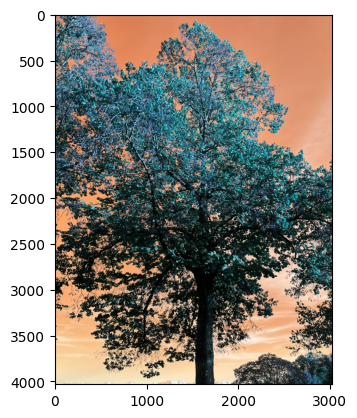

In [3]:
tree_img = cv2.imread('C:/Users/patri/OneDrive/Bilder/Tree/IMG_0671.JPG')
plt.imshow(tree_img)

In [4]:
distance = 5
pos_az = 10

img_az = 135
img_alt = 43

sun_pos = getSunPos()

sun_az = sun_pos[1]
sun_alt = sun_pos[2]
sun_size_deg = 0.533

res_x = tree_img.shape[1]
res_y = tree_img.shape[0]
pix_deg = res_x / 65

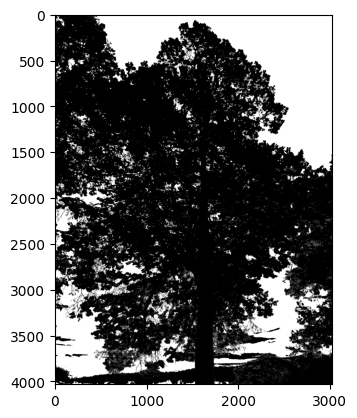

In [5]:
lower_bound = np.array([200, 0, 0])
upper_bound = np.array([360, 220, 220])

mask = cv2.inRange(tree_img, lower_bound, upper_bound)

plt.imshow(mask, cmap='gray')

In [6]:
cv2.imwrite("C:/Users/patri/OneDrive/Bilder/Tree/test_tree_gray.jpg", mask)

True

In [7]:
sun_az_rel = sun_az - img_az
sun_alt_rel = sun_alt - img_alt

center_x = sun_az_rel * pix_deg
center_y = sun_alt_rel * pix_deg

pos_x = (res_x / 2 + center_x).astype(int)
pos_y = (res_y / 2 - center_y).astype(int)
shape = (1,2)
coords = np.stack((pos_x, pos_y), axis=-1)

sun_size = int(sun_size_deg * pix_deg)

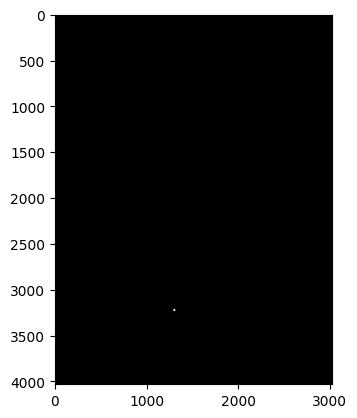

In [8]:
circle_masks = np.array(np.array([np.zeros_like(mask)]))
i=0
for coord in coords:
    circle_masks = np.append(circle_masks, [cv2.circle(np.zeros_like(mask), coord, sun_size//2, 255, -1)], axis=0)
    i+=1

plt.imshow(circle_masks[2], cmap='gray')

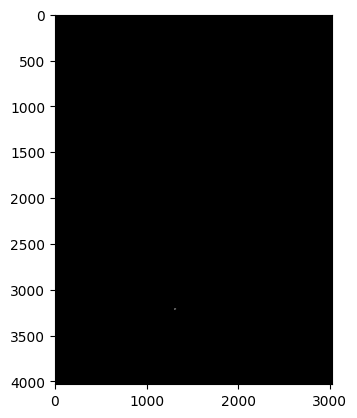

In [9]:
tree_cut = mask * circle_masks

plt.imshow(tree_cut[3], cmap='gray')

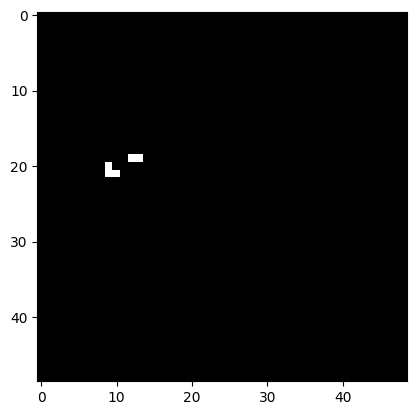

In [10]:
plt.imshow(tree_cut[1][pos_y[1]-sun_size:pos_y[1]+sun_size+1, pos_x[1]-sun_size:pos_x[1]+sun_size+1], cmap='gray')

C:\Users\patri\AppData\Local\Temp\ipykernel_15440\1446295694.py:2: RuntimeWarning: invalid value encountered in divide
  lai = np.delete((np.apply_over_axes(np.sum, tree_cut, [1,2]) / np.apply_over_axes(np.sum, circle_masks, [1,2]) * 255).reshape(-1),0)


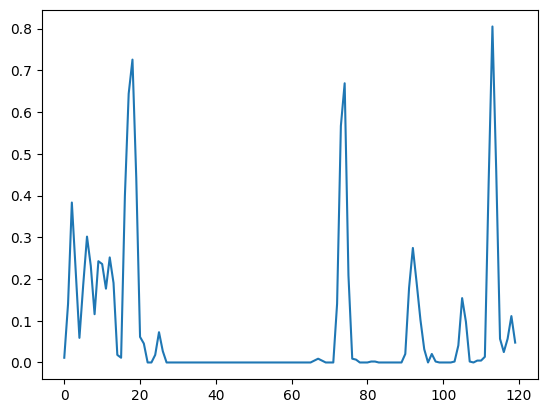

In [11]:
lai = np.delete((np.apply_over_axes(np.sum, tree_cut, [1,2]) / np.apply_over_axes(np.sum, circle_masks, [1,2]) * 255).reshape(-1),0)
plt.plot(lai)